### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 279_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,...,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000,7005.000000
mean,0.051155,0.245788,0.520368,0.947821,1.753829,5.021619,1.291131,1.078773,1.030034,1.013669,...,1.847314,1.878578,1.742768,1.880034,0.977324,1.587529,1.981444,2.062976,1.956297,45.553890
std,0.014060,0.012816,0.026282,0.022998,0.033077,4.383873,0.325984,0.059259,0.008671,0.004285,...,0.025432,0.016100,0.035236,0.032575,0.080316,0.029643,0.015806,0.002093,0.007071,16.246634
min,0.010039,0.191758,0.484357,0.921948,1.710525,2.054233,0.989370,1.045106,1.018111,0.989353,...,1.725314,1.810954,1.659719,1.759518,0.473604,1.469813,1.959988,2.050358,1.932075,29.000000
25%,0.041155,0.242214,0.506725,0.934647,1.735980,2.637464,1.162112,1.054564,1.025703,1.014218,...,1.839757,1.870062,1.722398,1.869687,0.934172,1.579243,1.972085,2.062729,1.951391,35.600000
50%,0.055570,0.245950,0.512206,0.939123,1.740140,3.085298,1.177246,1.058155,1.027550,1.015325,...,1.850209,1.878230,1.736830,1.884648,1.001043,1.590712,1.977229,2.063497,1.956923,39.100000
75%,0.060890,0.250115,0.520086,0.945700,1.747732,5.219406,1.219508,1.064280,1.029515,1.015968,...,1.860596,1.886939,1.753263,1.900330,1.035623,1.600335,1.985251,2.064067,1.961059,47.200000
max,0.088637,0.304575,0.679989,1.054260,1.910177,35.435504,3.446766,1.515990,1.106712,1.023084,...,1.910628,1.948234,1.920043,1.959881,1.090122,1.665329,2.046415,2.068536,1.982792,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

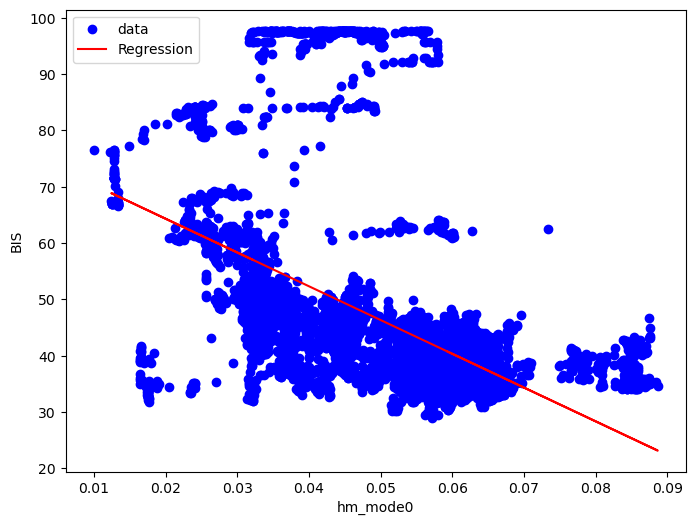

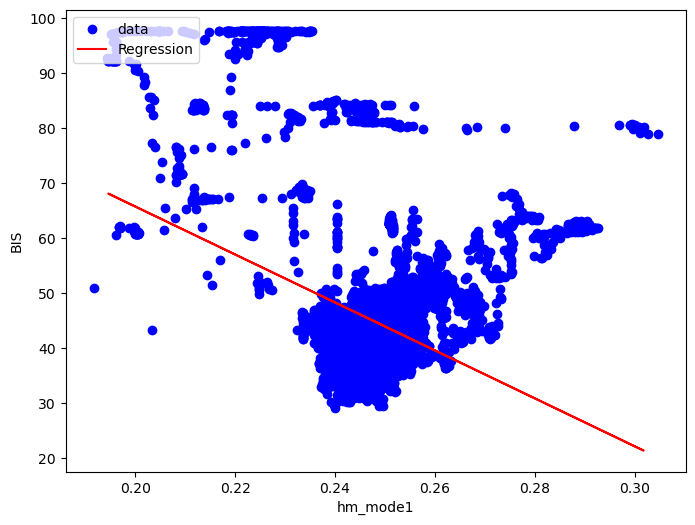

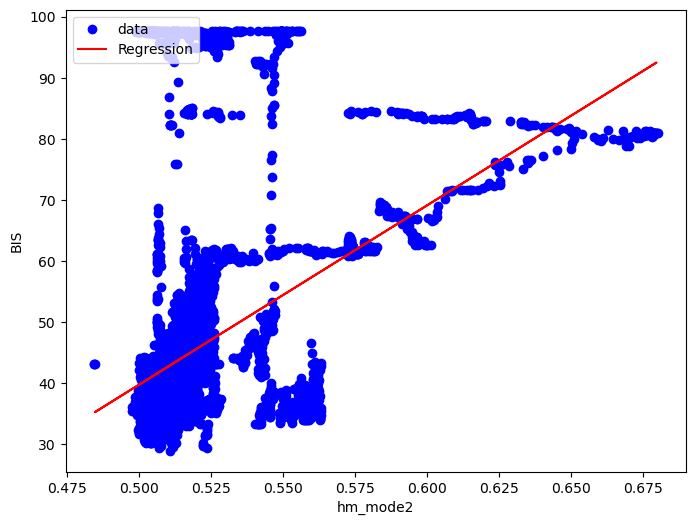

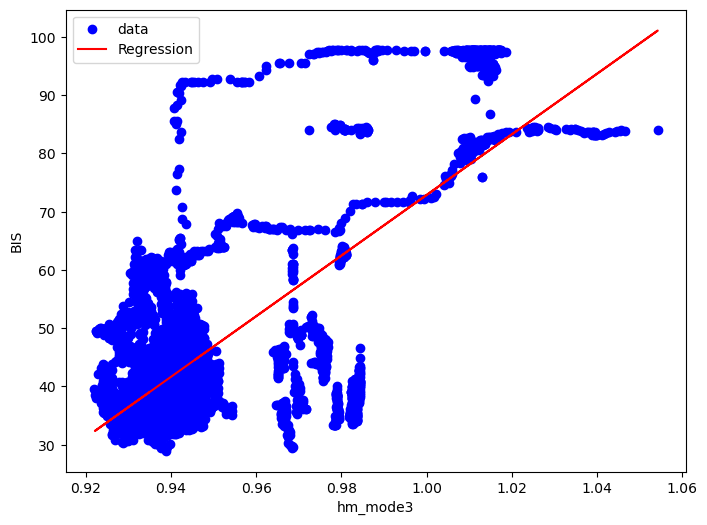

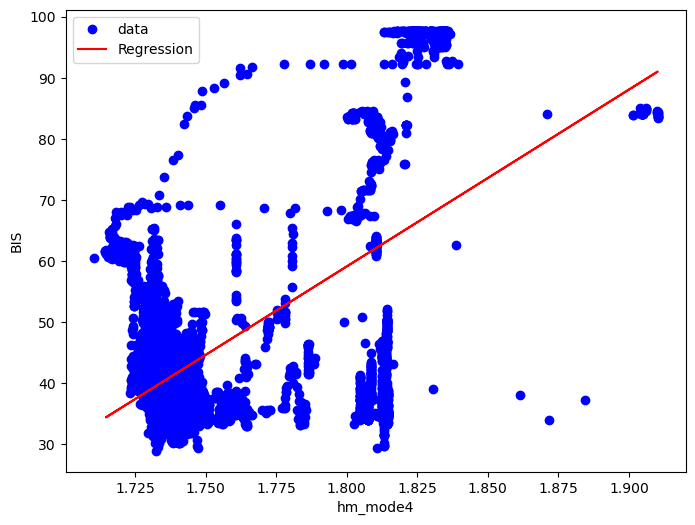

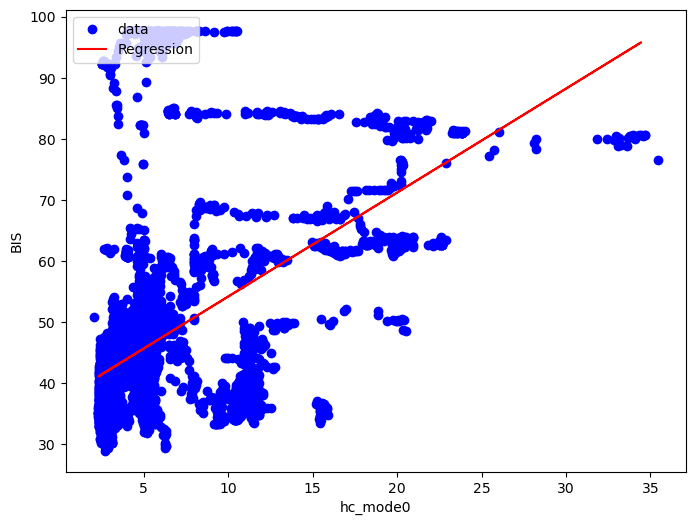

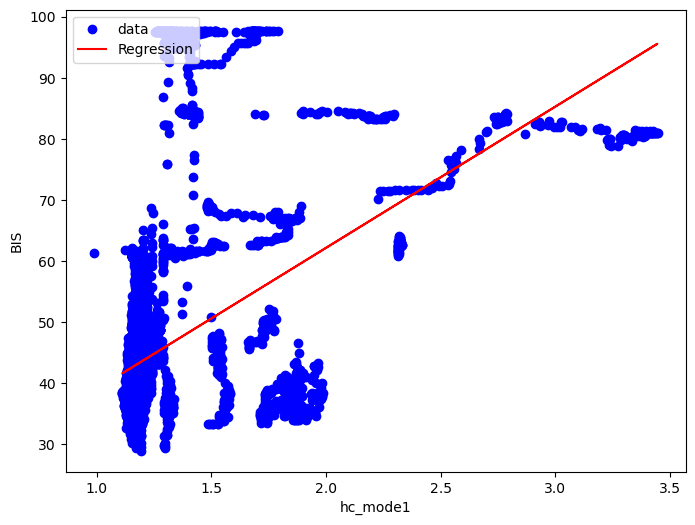

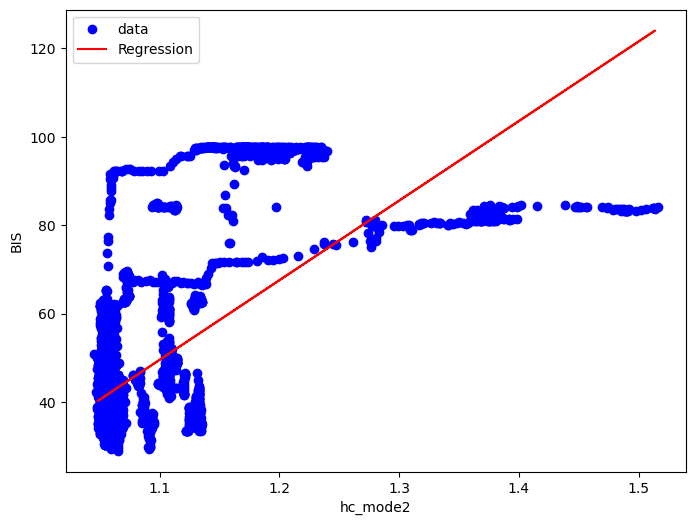

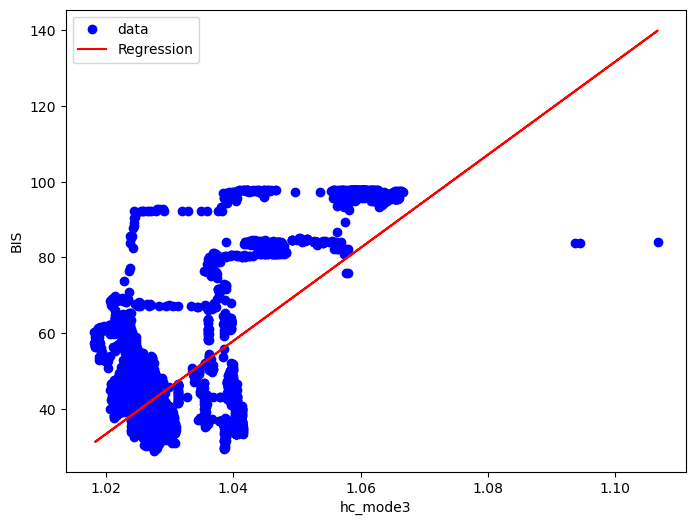

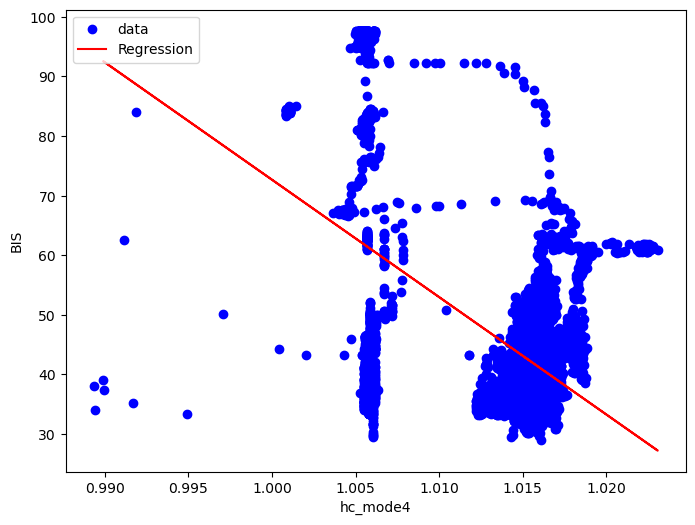

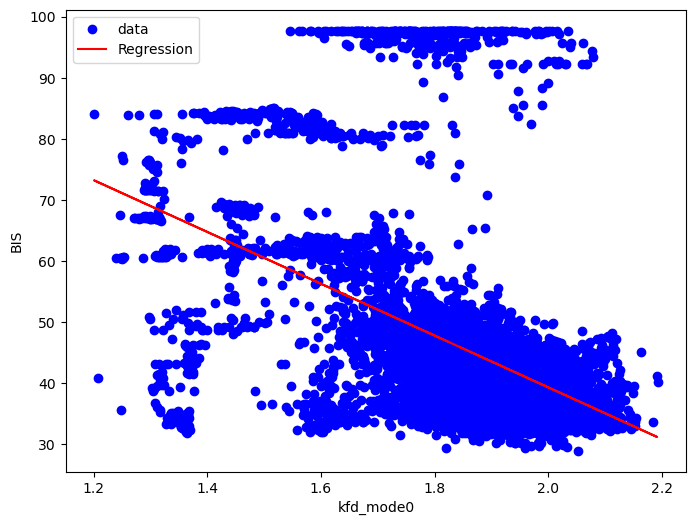

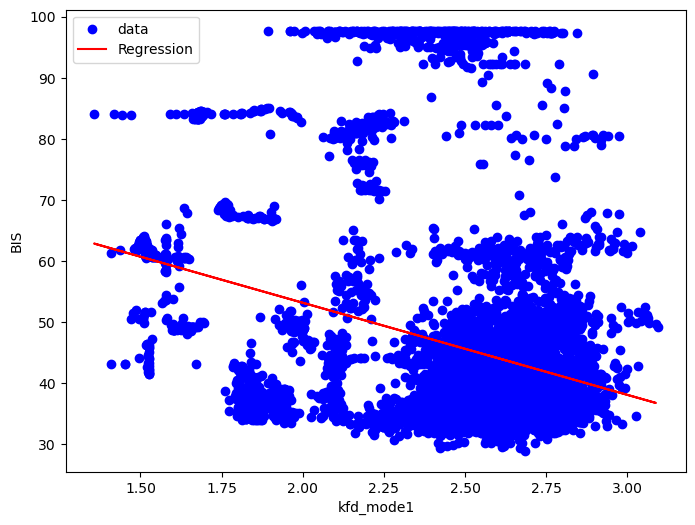

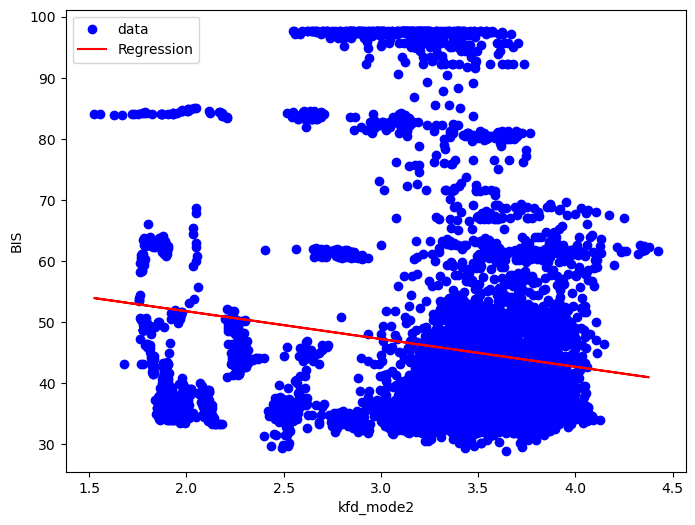

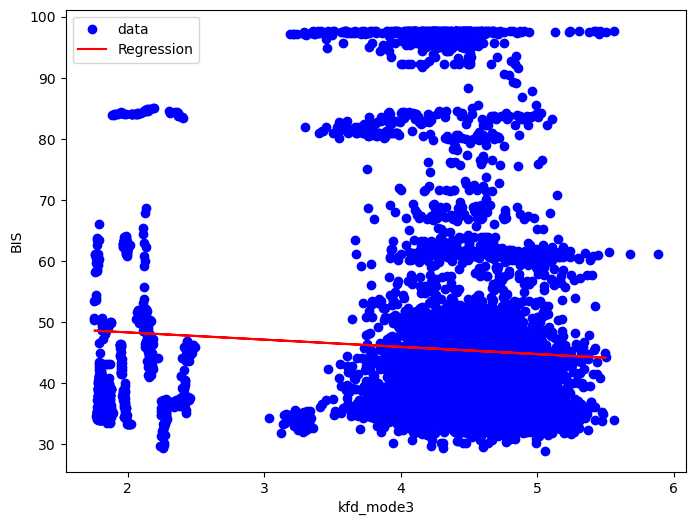

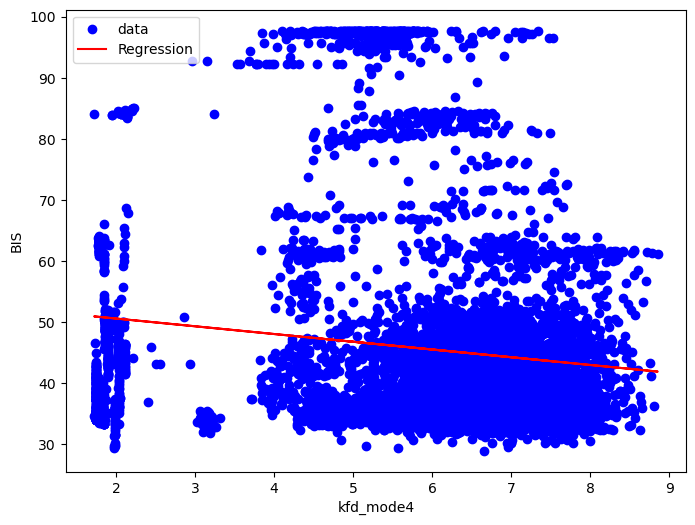

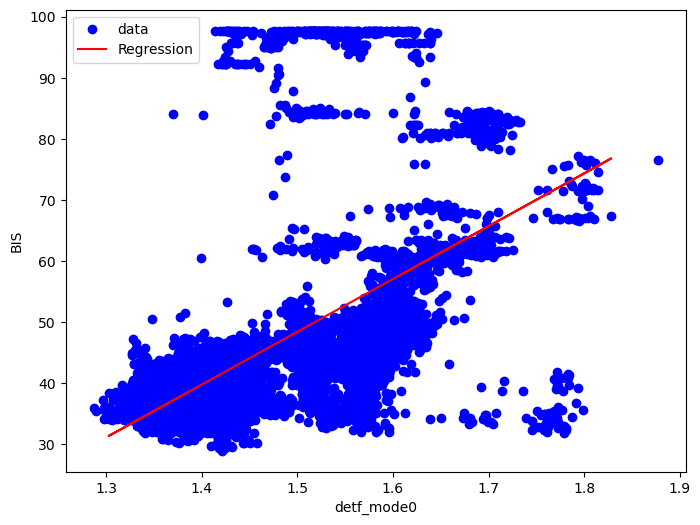

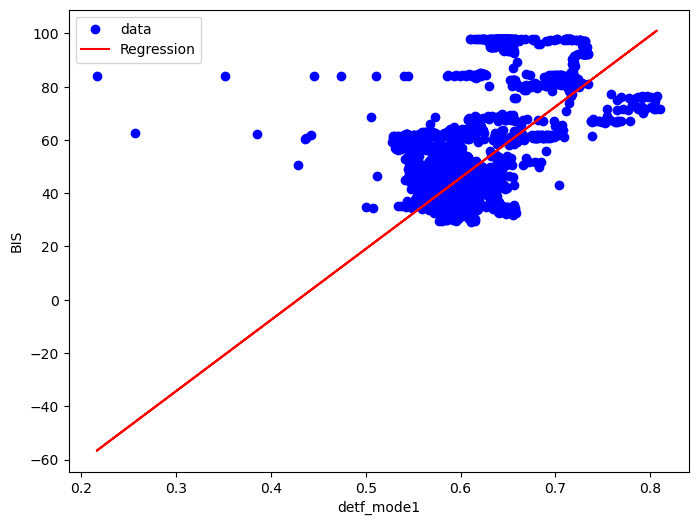

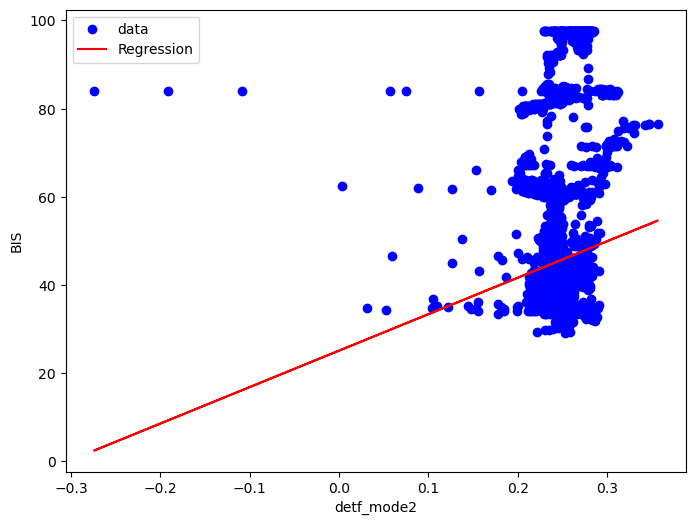

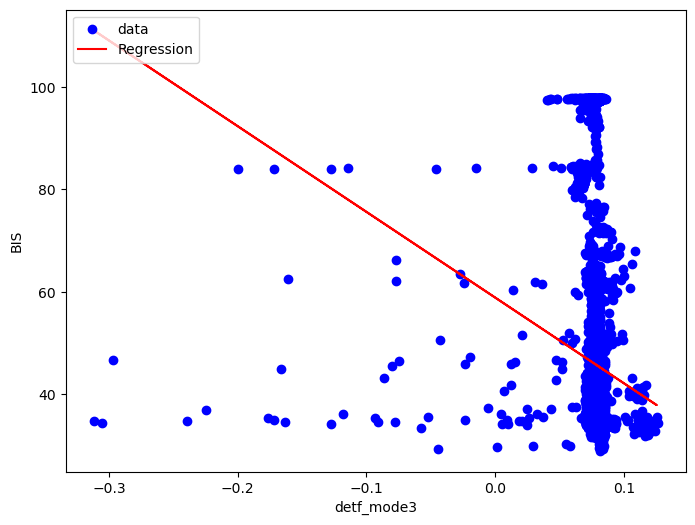

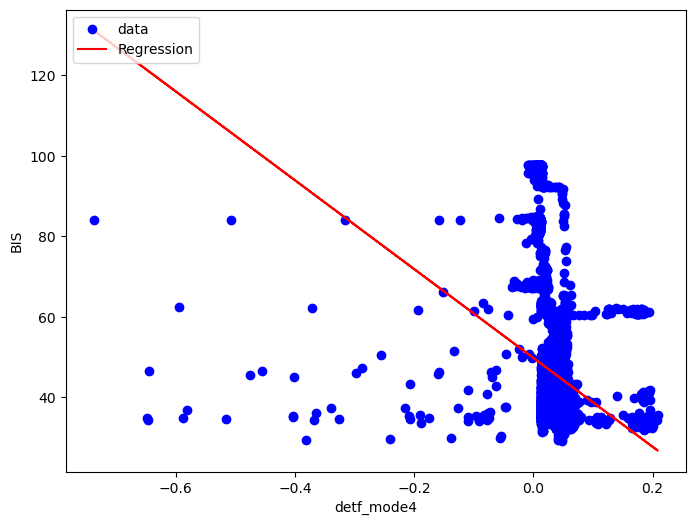

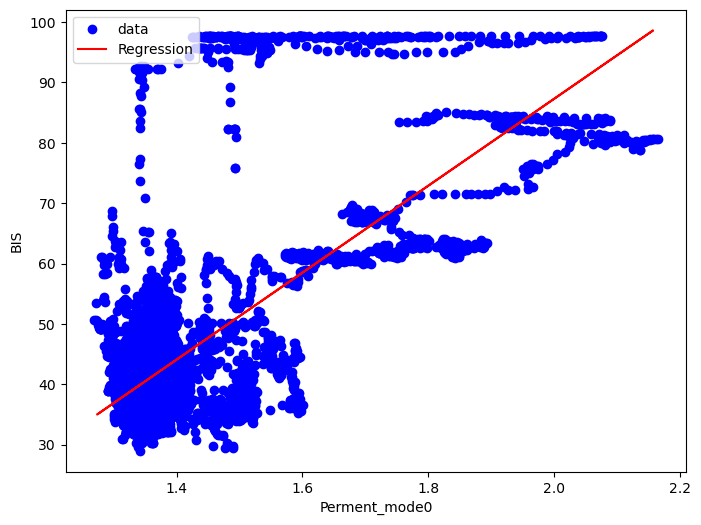

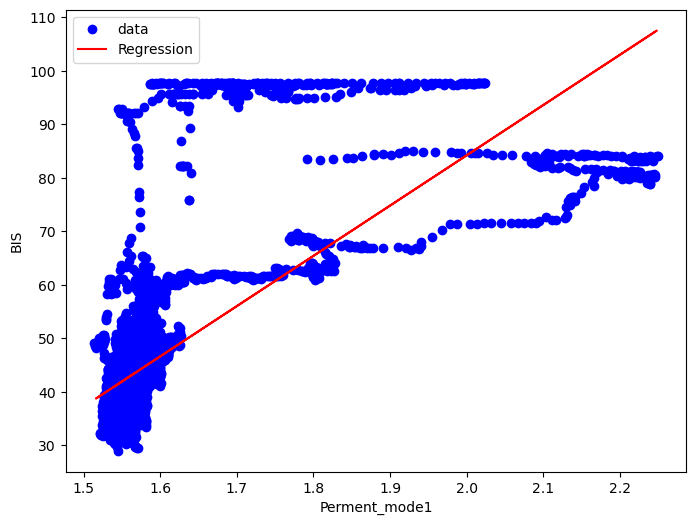

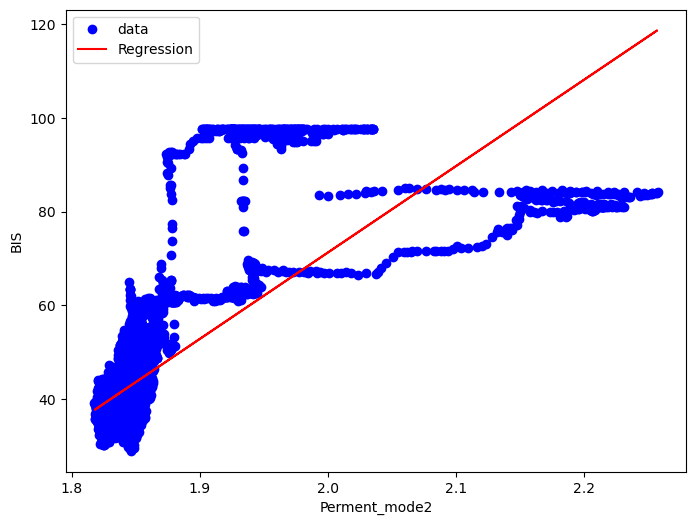

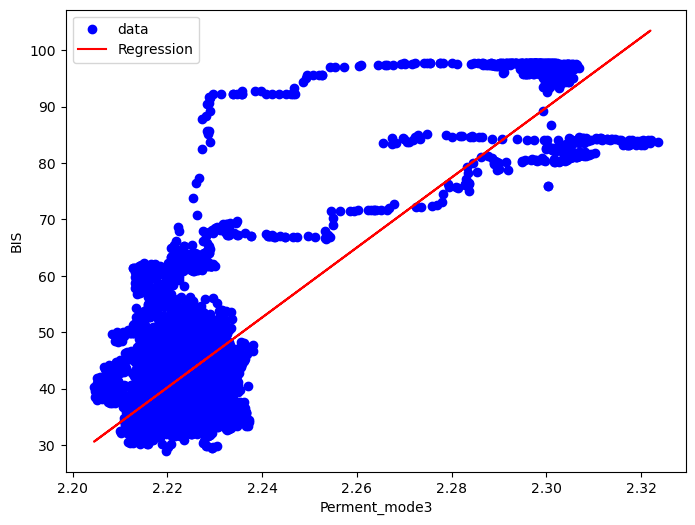

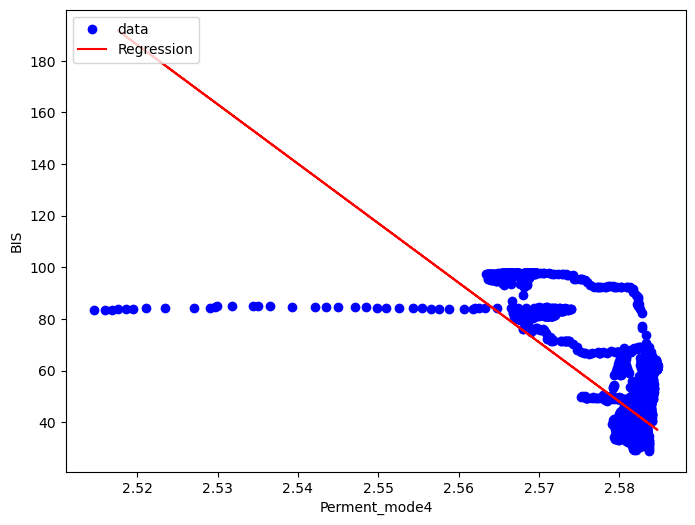

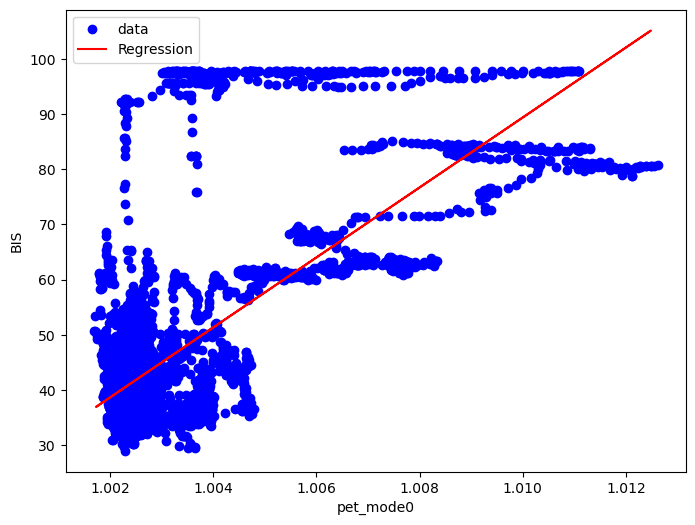

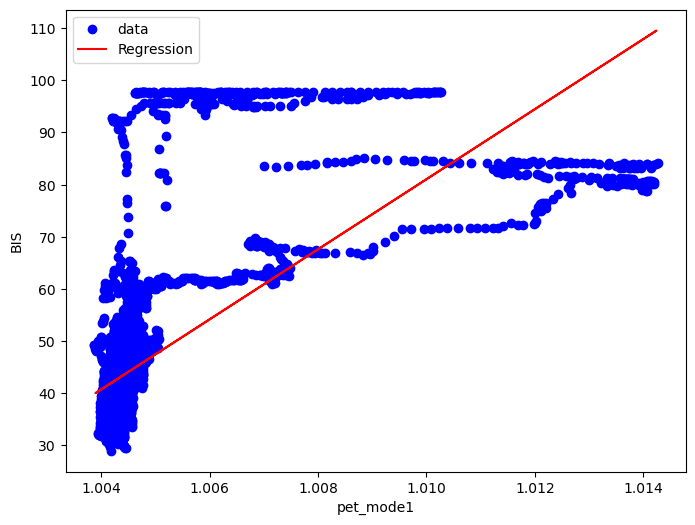

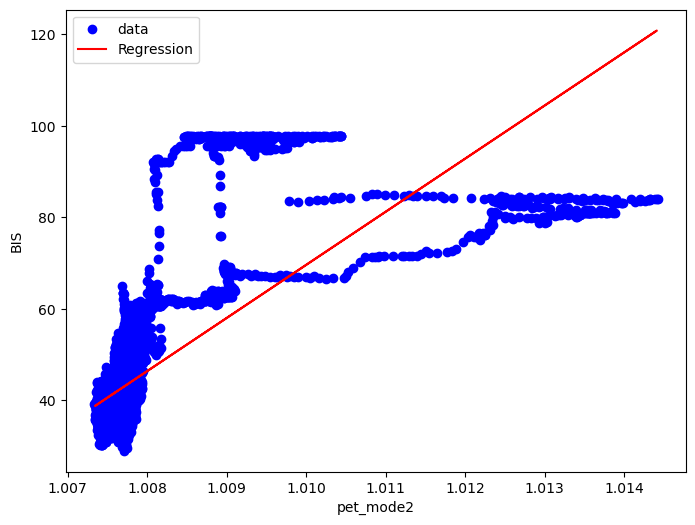

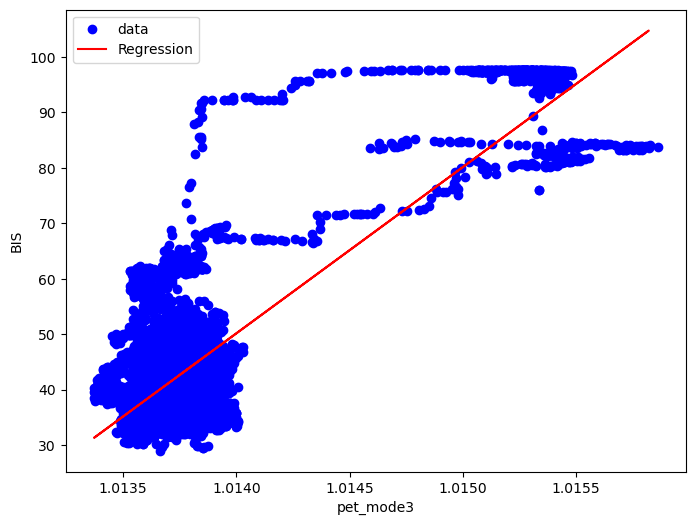

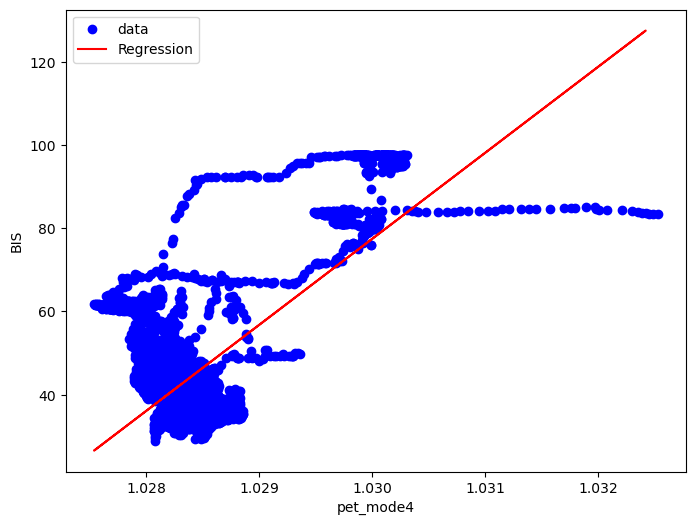

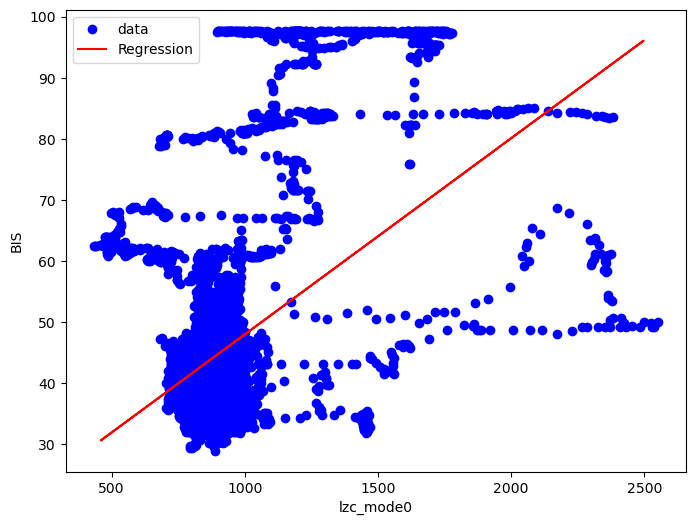

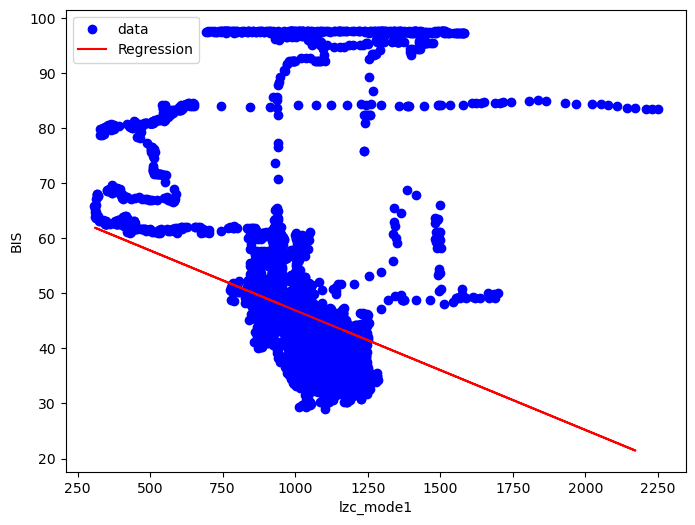

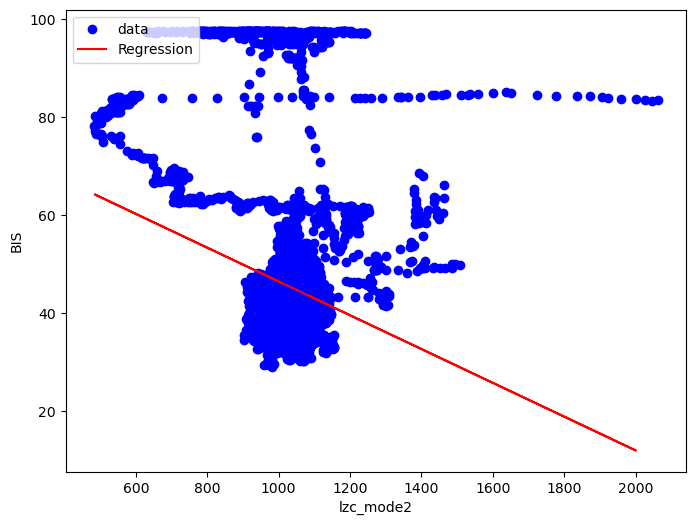

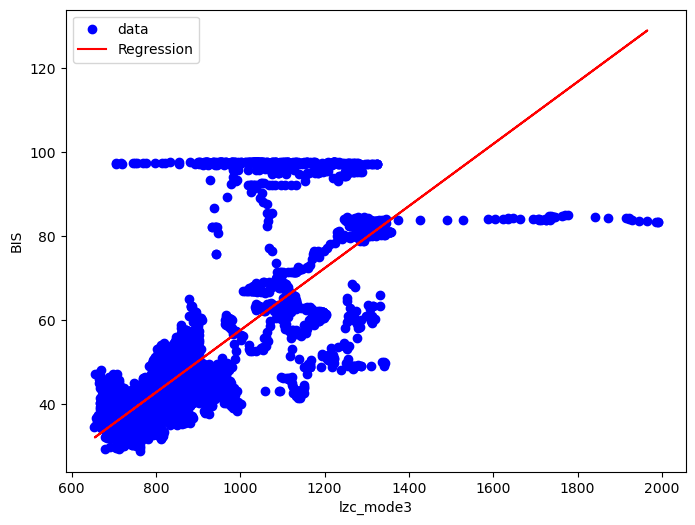

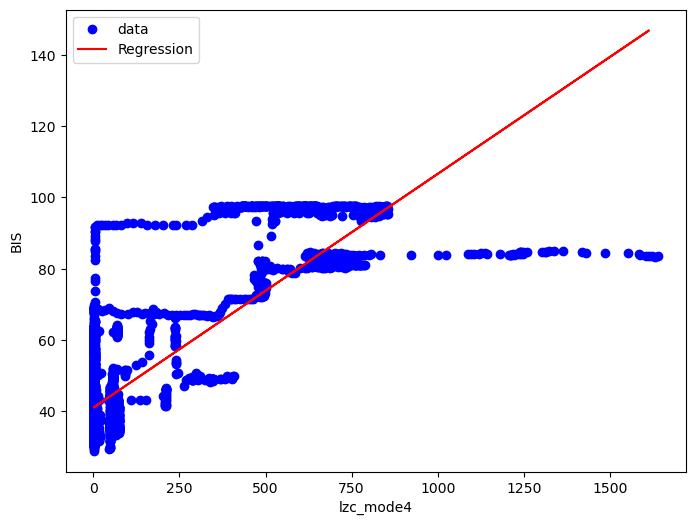

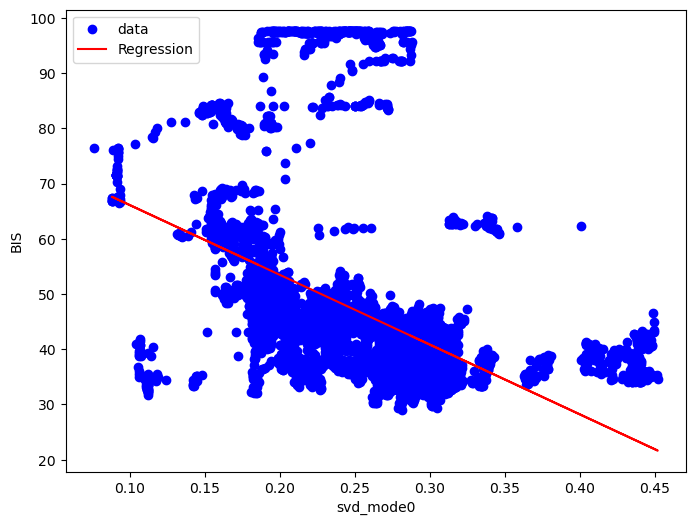

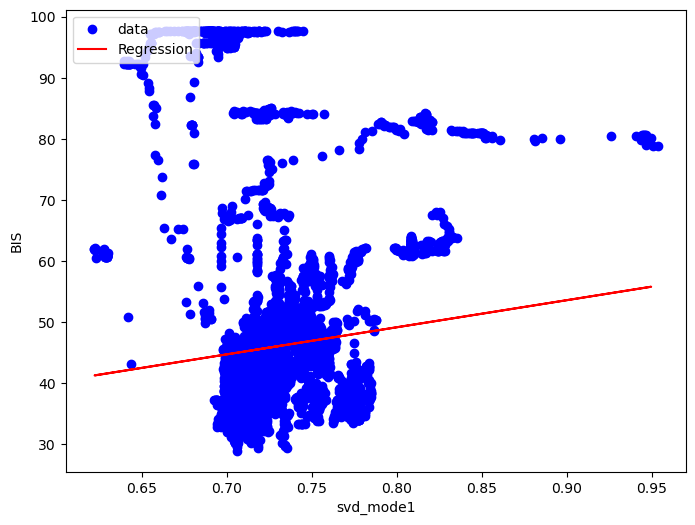

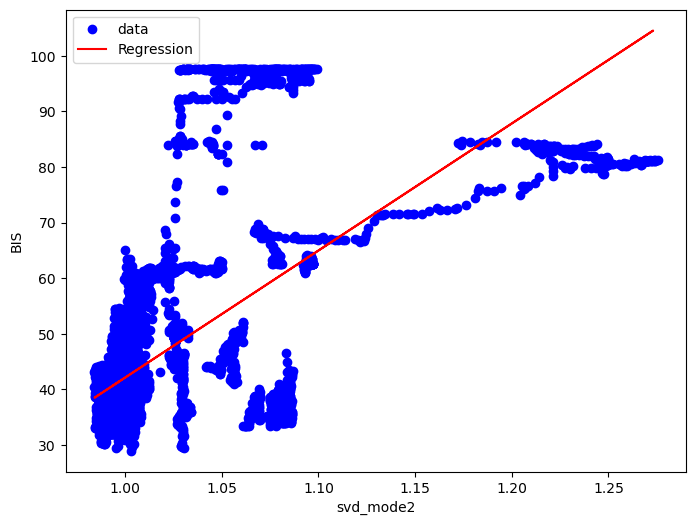

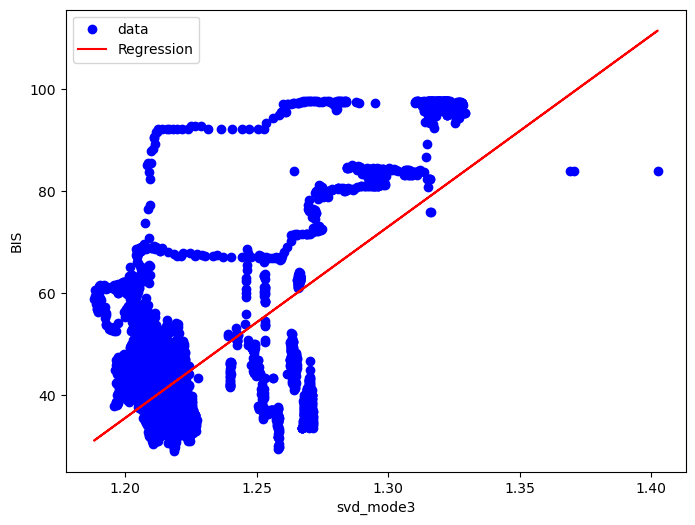

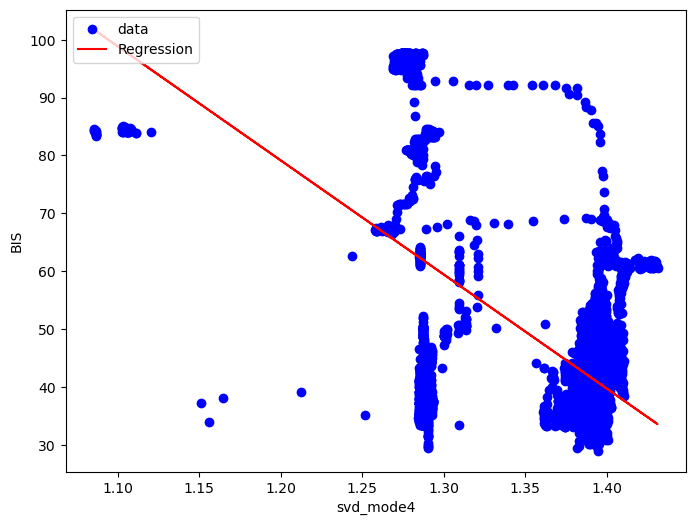

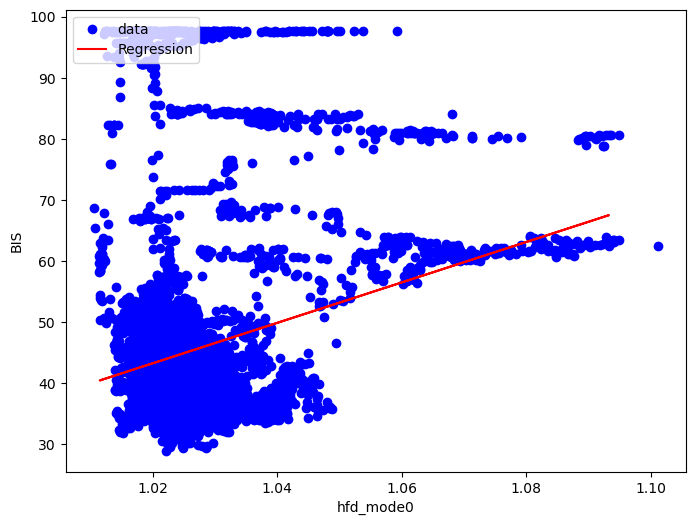

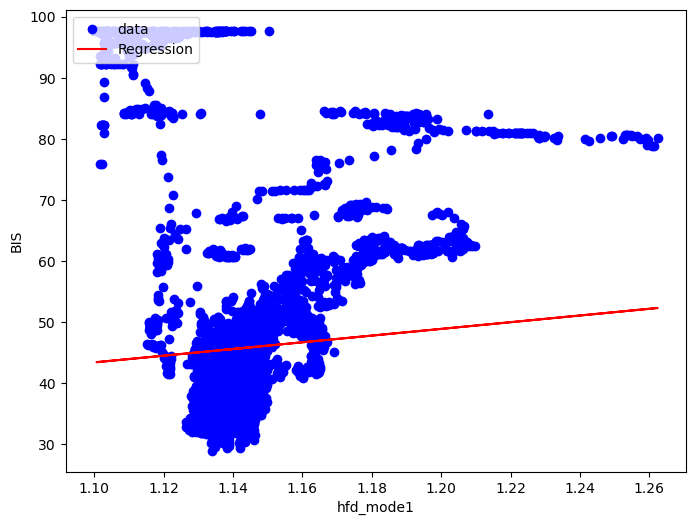

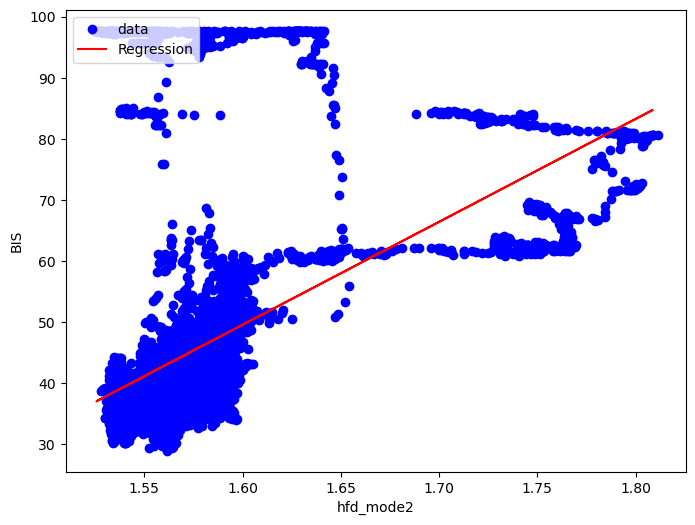

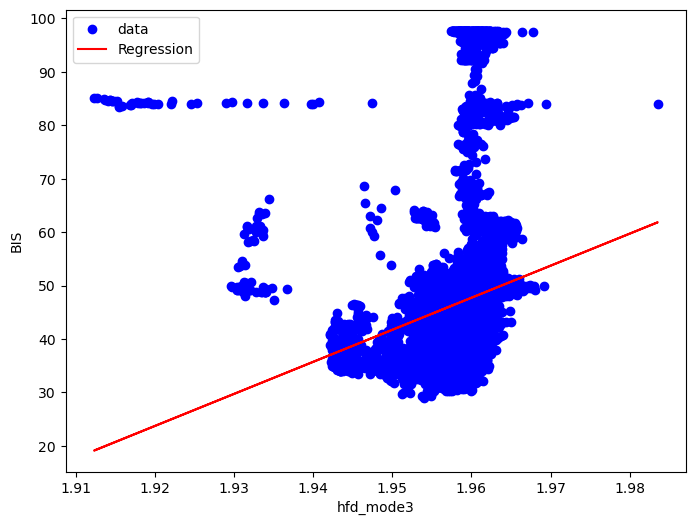

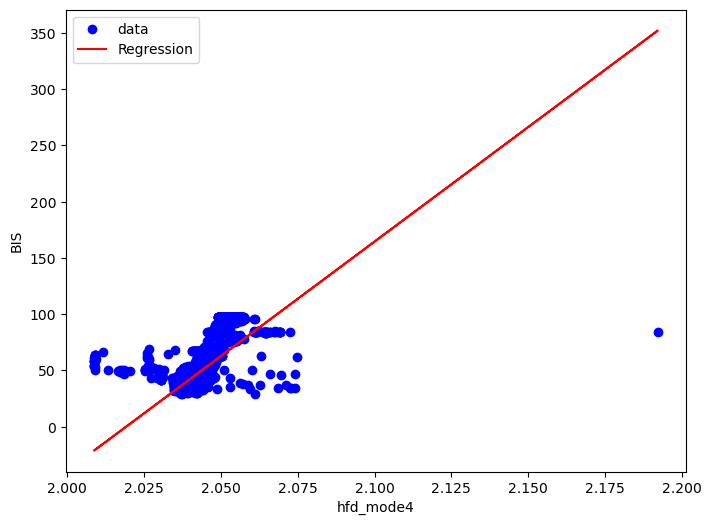

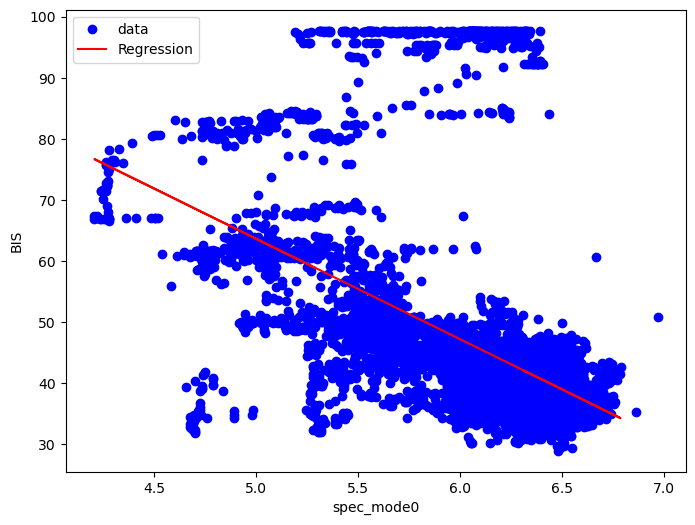

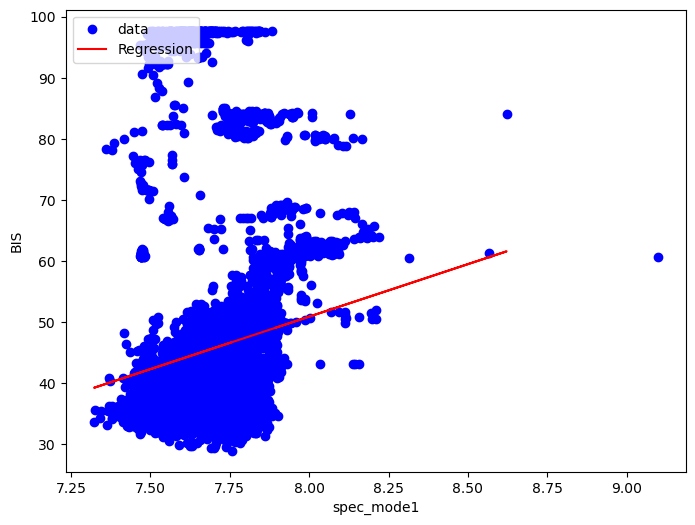

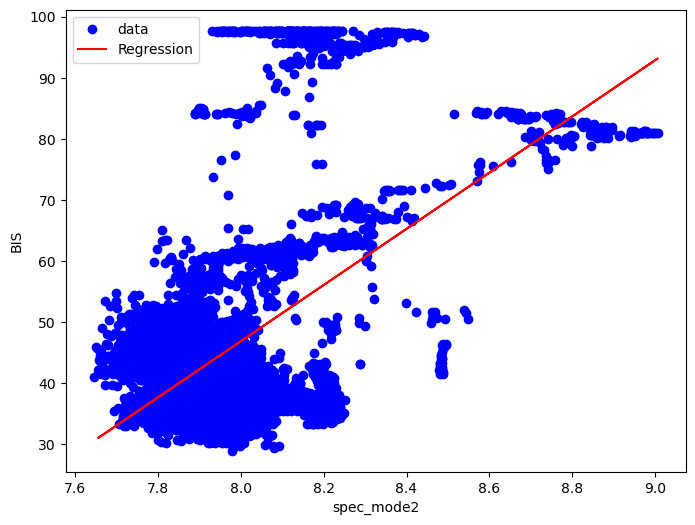

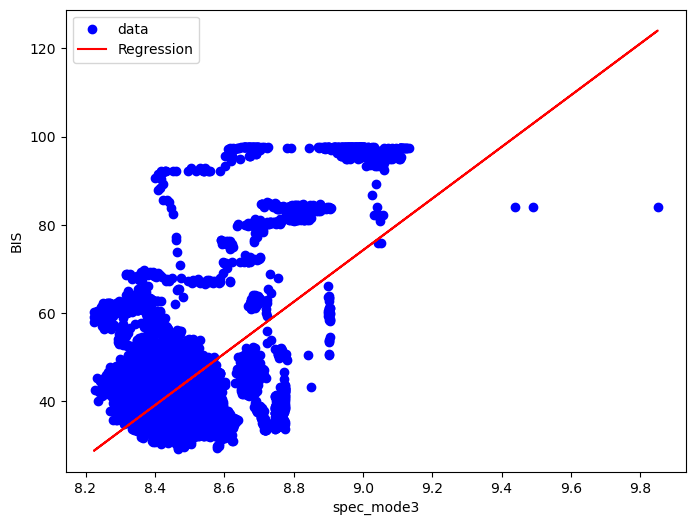

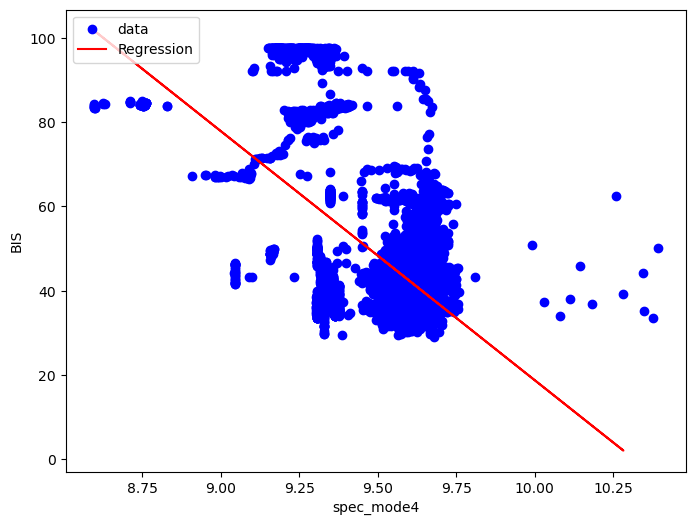

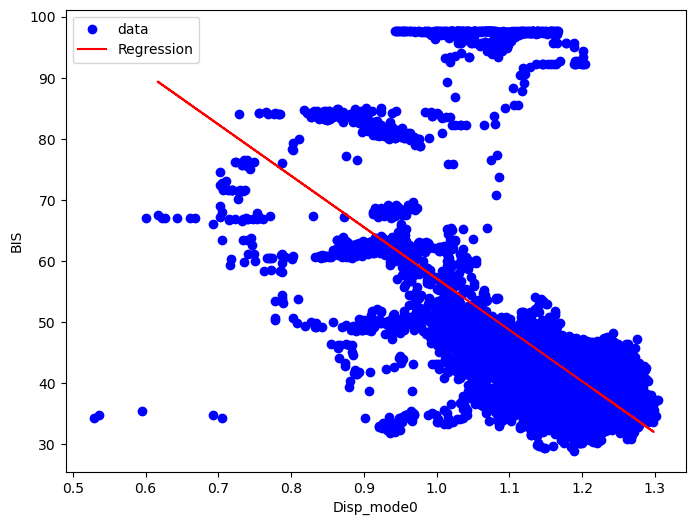

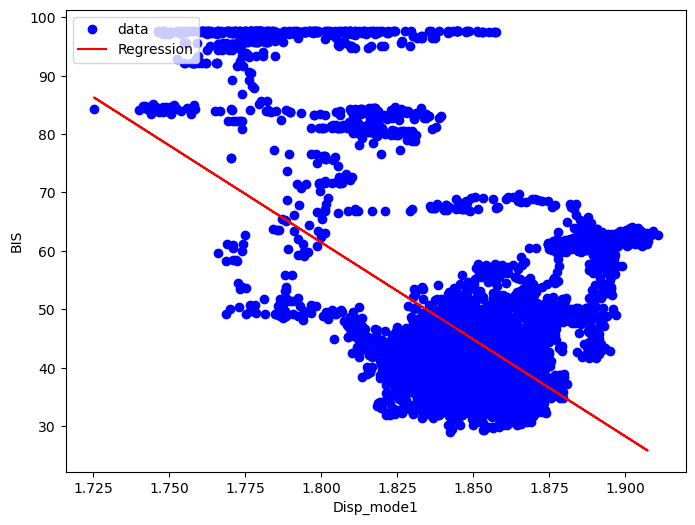

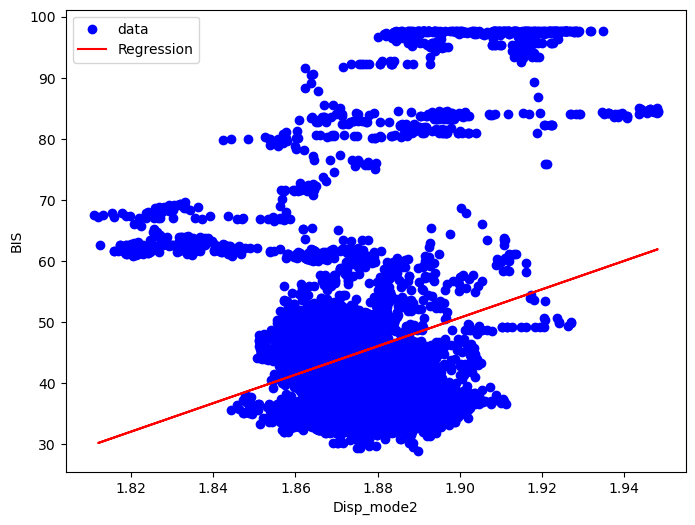

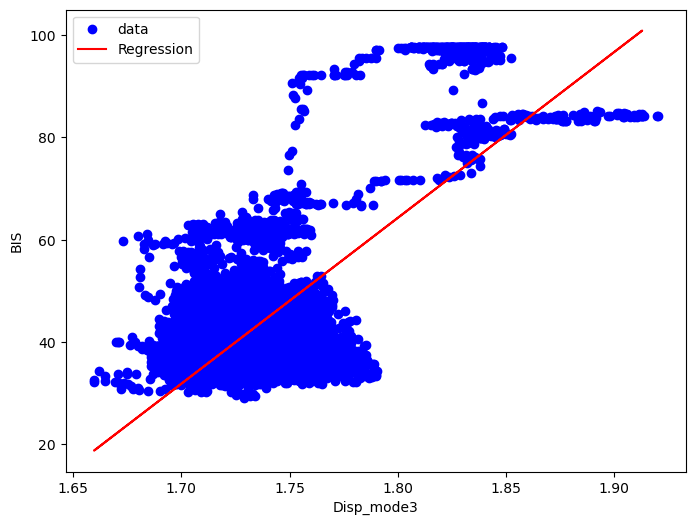

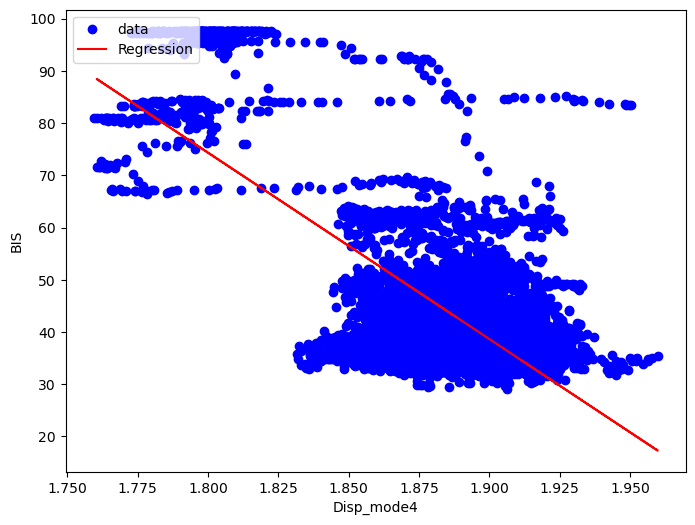

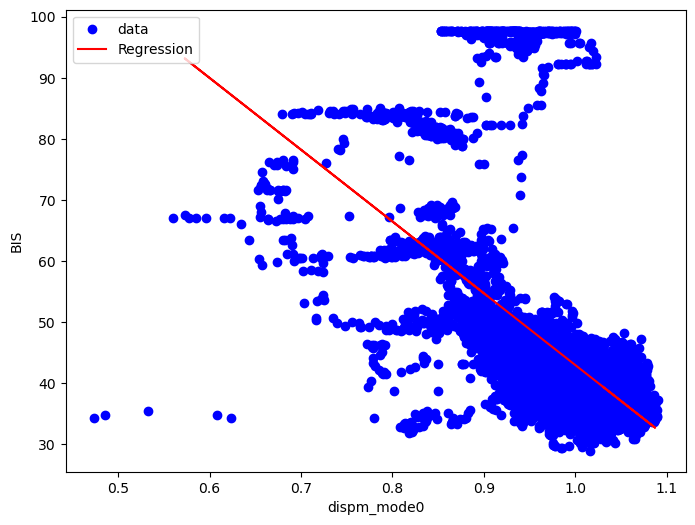

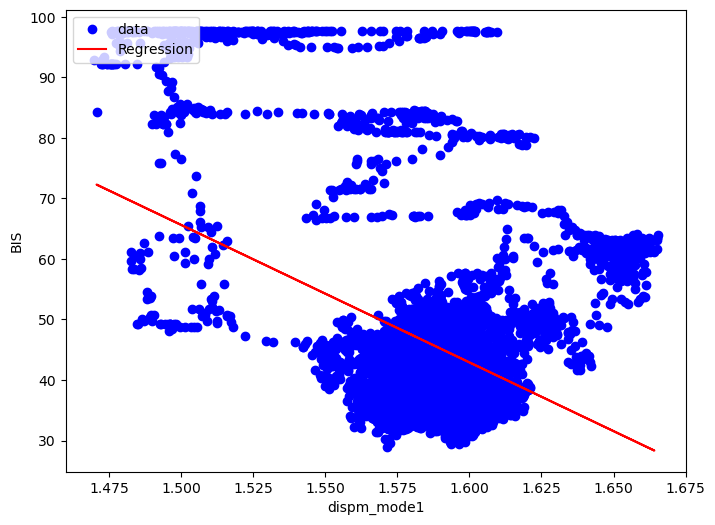

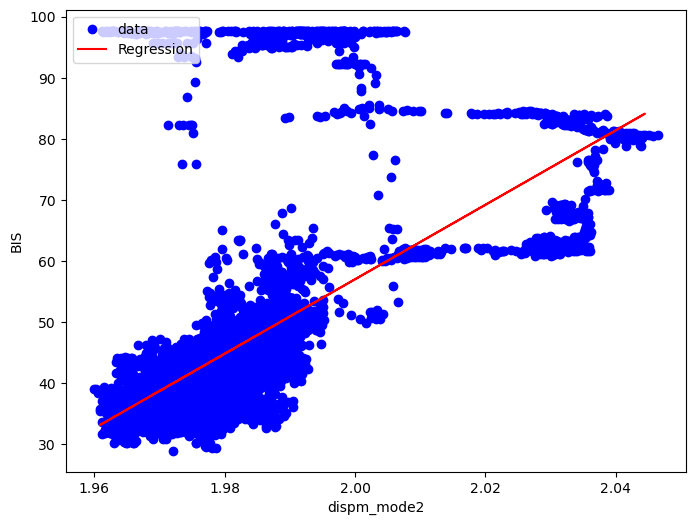

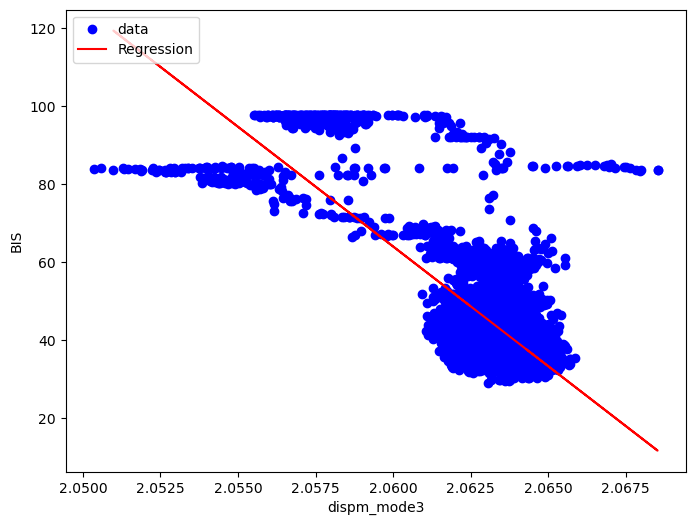

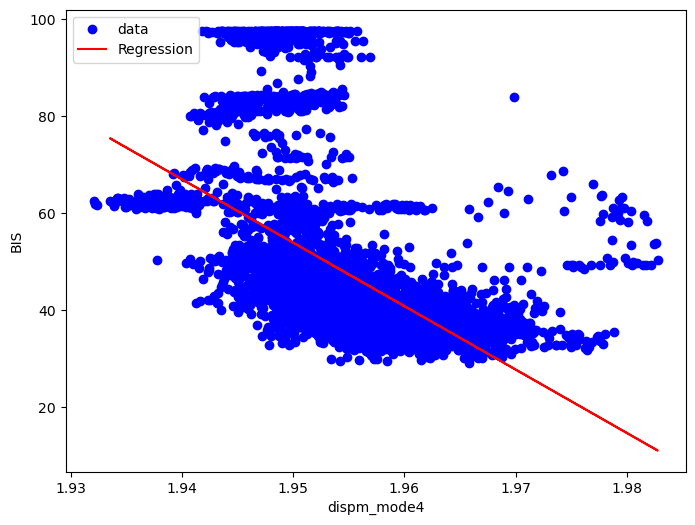

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
28,pet_mode3_r2,69.259497
23,Perment_mode3_r2,69.114659
34,lzc_mode4_r2,65.825423
33,lzc_mode3_r2,64.019091
58,dispm_mode3_r2,59.830152
22,Perment_mode2_r2,56.194004
27,pet_mode2_r2,52.374962
21,Perment_mode1_r2,52.029129
3,hm_mode3_r2,51.683047
20,Perment_mode0_r2,50.516547


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
22  Perment_mode2    0.438476
27      pet_mode2    0.329612
33      lzc_mode3    0.065648
53     Disp_mode3    0.049383
52     Disp_mode2    0.024516
41      hfd_mode1    0.011060
57    dispm_mode2    0.010161
24  Perment_mode4    0.008549
4        hm_mode4    0.007006
31      lzc_mode1    0.005634
55    dispm_mode0    0.004322
0        hm_mode0    0.004266
8        hc_mode3    0.003474
7        hc_mode2    0.002762
30      lzc_mode0    0.002714
56    dispm_mode1    0.002613
47     spec_mode2    0.001412
23  Perment_mode3    0.001411
29      pet_mode4    0.001306
51     Disp_mode1    0.001251
35      svd_mode0    0.001182
3        hm_mode3    0.001169
50     Disp_mode0    0.001132
15     detf_mode0    0.001080
28      pet_mode3    0.000963
32      lzc_mode2    0.000949
6        hc_mode1    0.000946
38      svd_mode3    0.000927
5        hc_mode0    0.000849
54     Disp_mode4    0.000844
42      hfd_mode2    0.000824
10      kfd_mode0    0.000786
1        h